In [2]:
# Install required libraries
!pip install -q yfinance
!pip install yfinance --upgrade --no-cache-dir

In [3]:
!pip install pyngrok
!pip install streamlit ngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [4]:
# import libraries
import yfinance as yf
from pandas_datareader import data as pdr
from pandas_datareader.data import DataReader
from datetime import datetime
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import streamlit as st
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates
import seaborn as sns

# Sprint 1 development

In [5]:
# The tech stocks we'll use for this analysis
tech_list = ['TSLA', 'NVDA', 'NFLX', 'AAL']

# Set up End and Start times for data grab
tech_list = ['TSLA', 'NVDA', 'NFLX', 'AAL']

end = datetime.datetime.today()
start = end - datetime.timedelta(days=365)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [TSLA, NVDA, NFLX, AAL]
company_name = ["TSLA", "NVDA", "NFLX", "AAL"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df_ = pd.concat(company_list, axis=1)
df_.tail(10)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Low,Open,Volume,company_name,Close,High,Low,Open,Volume,company_name
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,NVDA,NVDA,NVDA,NVDA,...,NFLX,NFLX,NFLX,,AAL,AAL,AAL,AAL,AAL,
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-03,267.279999,276.299988,261.510010,265.290009,136174300,TSLA,101.800003,105.629997,101.599998,103.510002,...,900.469971,901.799988,5864600,NFLX,9.5100,9.98,9.50,9.98,77097900,AAL
2025-04-04,239.429993,261.000000,236.000000,255.380005,181229400,TSLA,94.309998,100.129997,92.110001,98.910004,...,853.869995,896.500000,6798800,NFLX,9.4600,9.58,8.50,9.22,110348000,AAL
2025-04-07,233.289993,252.000000,214.250000,223.779999,183453800,TSLA,97.639999,101.750000,86.620003,87.459999,...,821.099976,827.849976,6656800,NFLX,9.7100,10.22,9.00,9.01,74435400,AAL
2025-04-08,221.860001,250.440002,217.800003,245.000000,171603500,TSLA,96.300003,105.849998,94.459999,103.809998,...,857.700012,912.440002,5625400,NFLX,9.0700,10.07,8.92,10.05,81034700,AAL
2025-04-09,272.200012,274.690002,223.880005,224.690002,219433400,TSLA,114.330002,115.099998,97.529999,98.889999,...,854.400024,855.929993,7498000,NFLX,11.1200,11.23,9.09,9.13,133951300,AAL
2025-04-10,252.399994,262.489990,239.330002,260.000000,181722600,TSLA,107.570000,110.860001,99.150002,109.370003,...,894.000000,931.940002,5129800,NFLX,9.5100,10.66,9.44,10.53,84127700,AAL
2025-04-11,252.309998,257.739990,241.360001,251.839996,128948100,TSLA,110.930000,111.550003,107.480003,108.500000,...,906.679993,920.000000,4073600,NFLX,9.6700,9.70,9.30,9.51,53220900,AAL
2025-04-14,252.350006,261.799988,245.929993,258.359985,100135200,TSLA,110.709999,114.290001,109.070000,114.110001,...,919.500000,932.700012,4035900,NFLX,9.5800,9.97,9.43,9.97,62460000,AAL


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

In [6]:
# Summary Stats
TSLA.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,267.315238,273.985317,260.536310,267.458334,9.566905e+07
std,81.939959,84.423265,79.469344,82.454835,3.904404e+07
min,142.050003,144.440002,138.800003,140.559998,1.736828e+07
25%,208.865005,214.810001,205.540001,209.447502,6.748362e+07
50%,248.159996,251.709999,240.104996,247.264999,8.447765e+07
75%,333.795013,345.979996,327.222496,338.787514,1.141729e+08
max,479.859985,488.540009,457.510010,475.899994,2.438697e+08


In [7]:
TSLA.shape

(252, 6)

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [8]:
# General info
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-04-16 to 2025-04-16
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, TSLA)     252 non-null    float64
 1   (High, TSLA)      252 non-null    float64
 2   (Low, TSLA)       252 non-null    float64
 3   (Open, TSLA)      252 non-null    float64
 4   (Volume, TSLA)    252 non-null    int64  
 5   (company_name, )  252 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.8+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

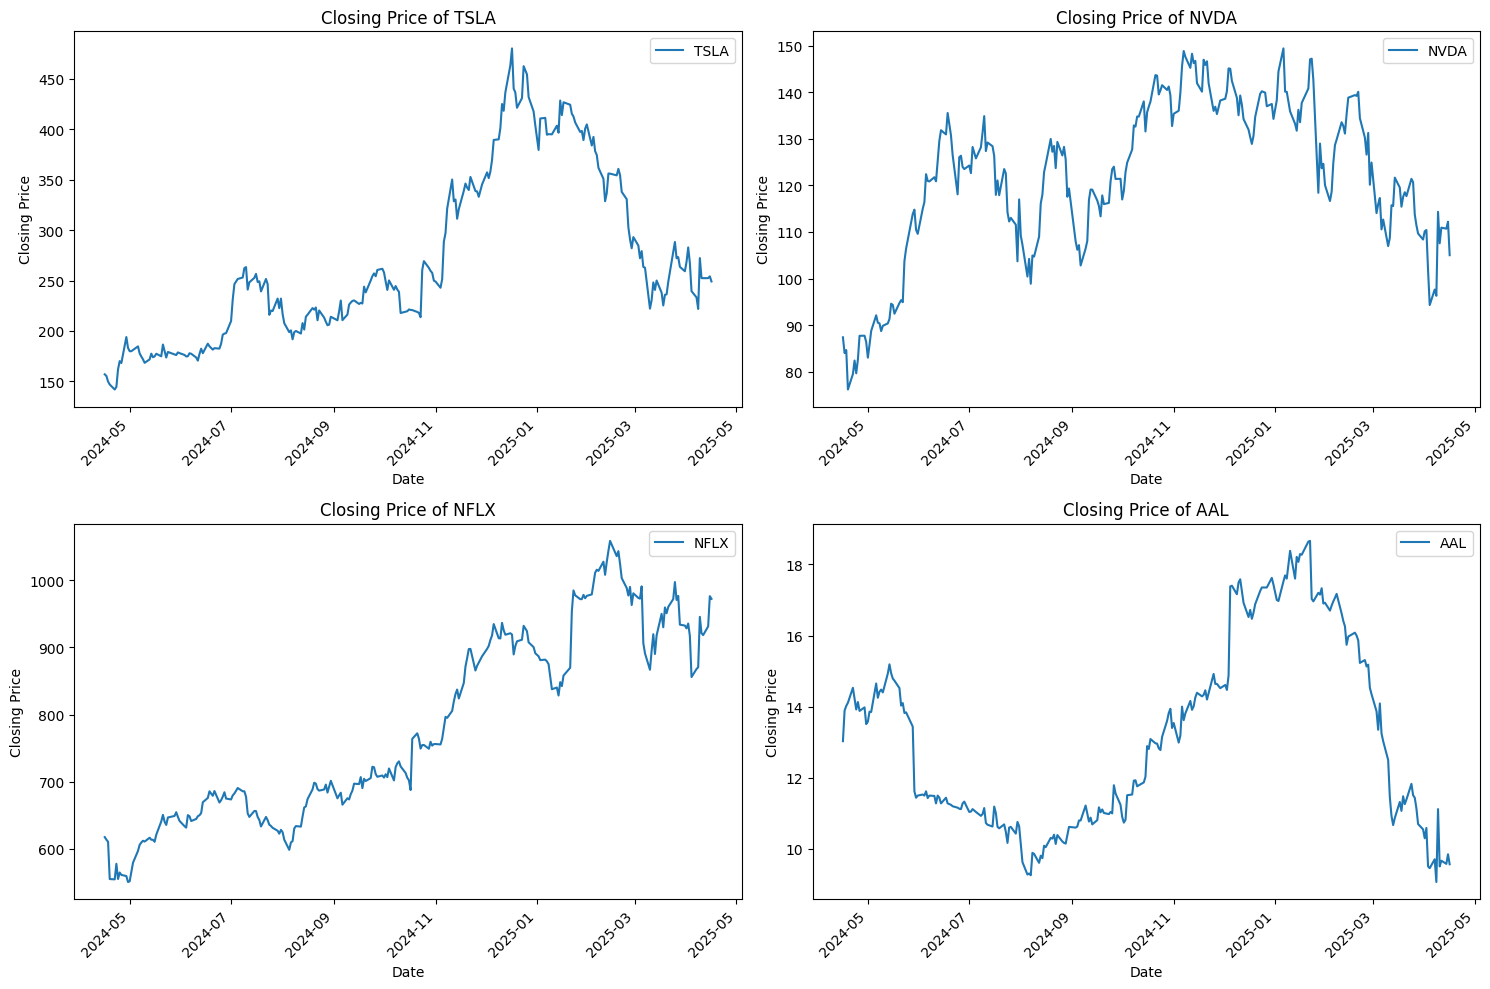

In [9]:
import matplotlib.pyplot as plt

# Setting up the figure and layout for multiple subplots
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust vertical and horizontal spacing

# Assuming company_list is a list of dataframes and tech_list contains corresponding company names
for i, company in enumerate(company_list, start=1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    company['Close'].plot(ax=plt.gca())  # Explicitly get the current axis to avoid overlap
    plt.ylabel('Closing Price')  # Set y-axis label
    plt.xlabel('Date')  # Set x-axis label
    plt.title(f"Closing Price of {tech_list[i - 1]}")  # Set the title for each subplot
    plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
    plt.legend([tech_list[i - 1]], loc='best')  # Add legend with company name

# Final adjustments and displaying the plots
plt.tight_layout()  # Ensures no overlaps between subplots
plt.show()


## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

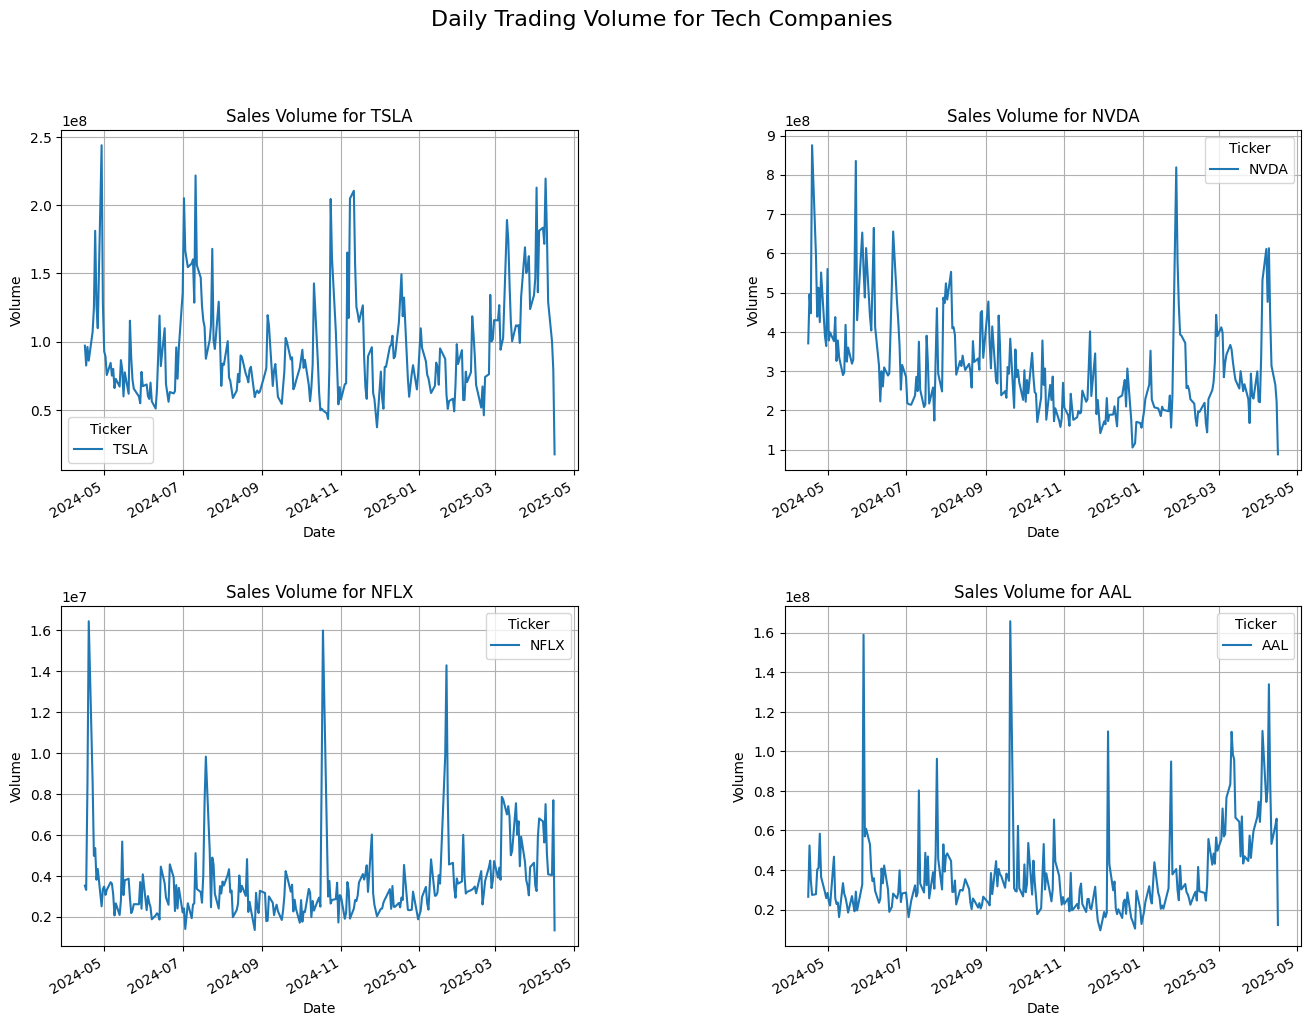

In [10]:
import matplotlib.pyplot as plt

# Adjust figure size and layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Create a 2x2 grid of subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between subplots

# Loop through companies and plot data
for i, (company, ax) in enumerate(zip(company_list, axes.flatten())):
    company['Volume'].plot(ax=ax)  # Plot the 'Volume' column on the respective axis
    ax.set_title(f"Sales Volume for {tech_list[i]}")  # Set title for each subplot
    ax.set_ylabel("Volume")  # Set y-axis label
    ax.set_xlabel("Date")  # Set x-axis label
    ax.grid(True)  # Add a grid for better readability

# Add a global title
fig.suptitle("Daily Trading Volume for Tech Companies", fontsize=16)

plt.show()


Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

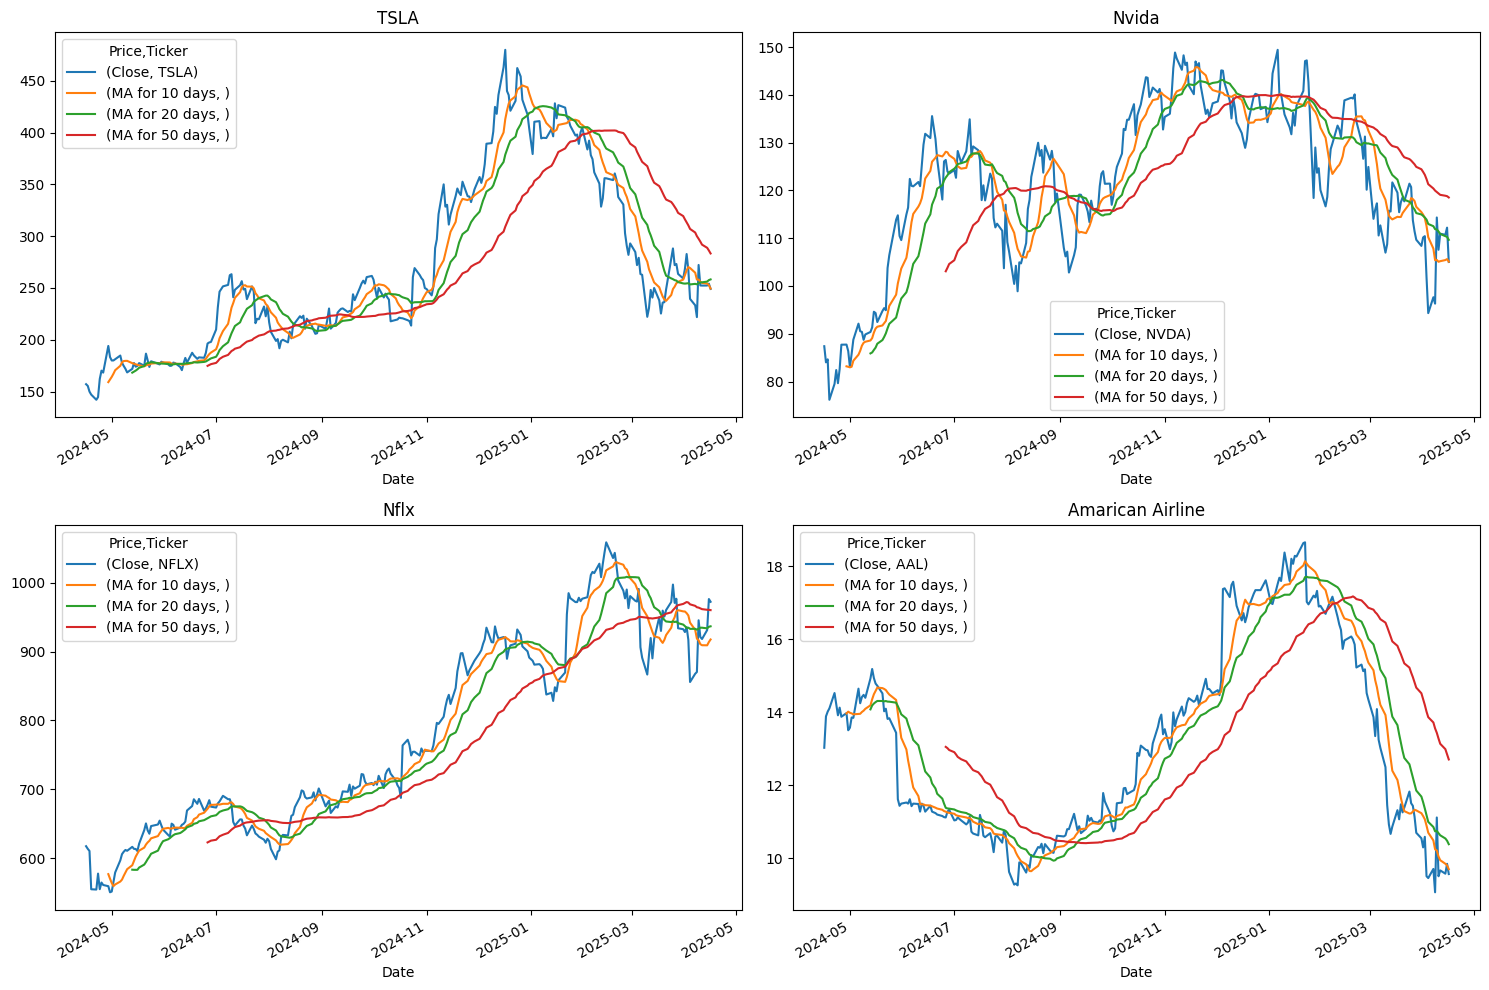

In [11]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('TSLA')

NVDA[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Nvida')

NFLX[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Nflx')

AAL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Amarican Airline')

fig.tight_layout()

We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

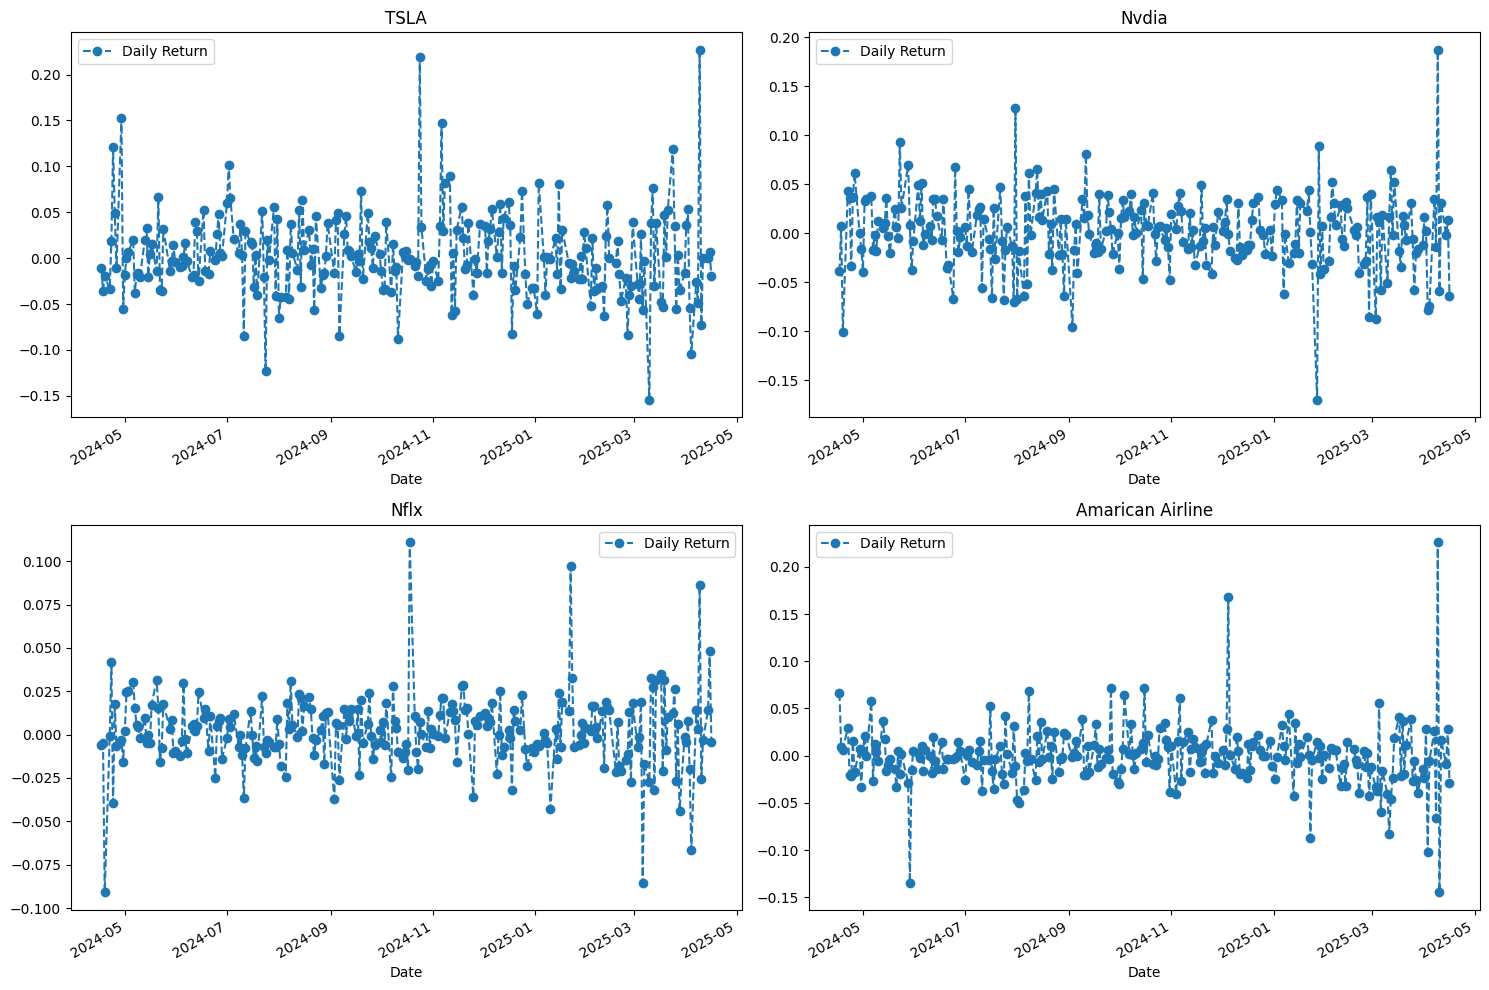

In [12]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('TSLA')

NVDA['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Nvdia')

NFLX['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Nflx')

AAL['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Amarican Airline')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

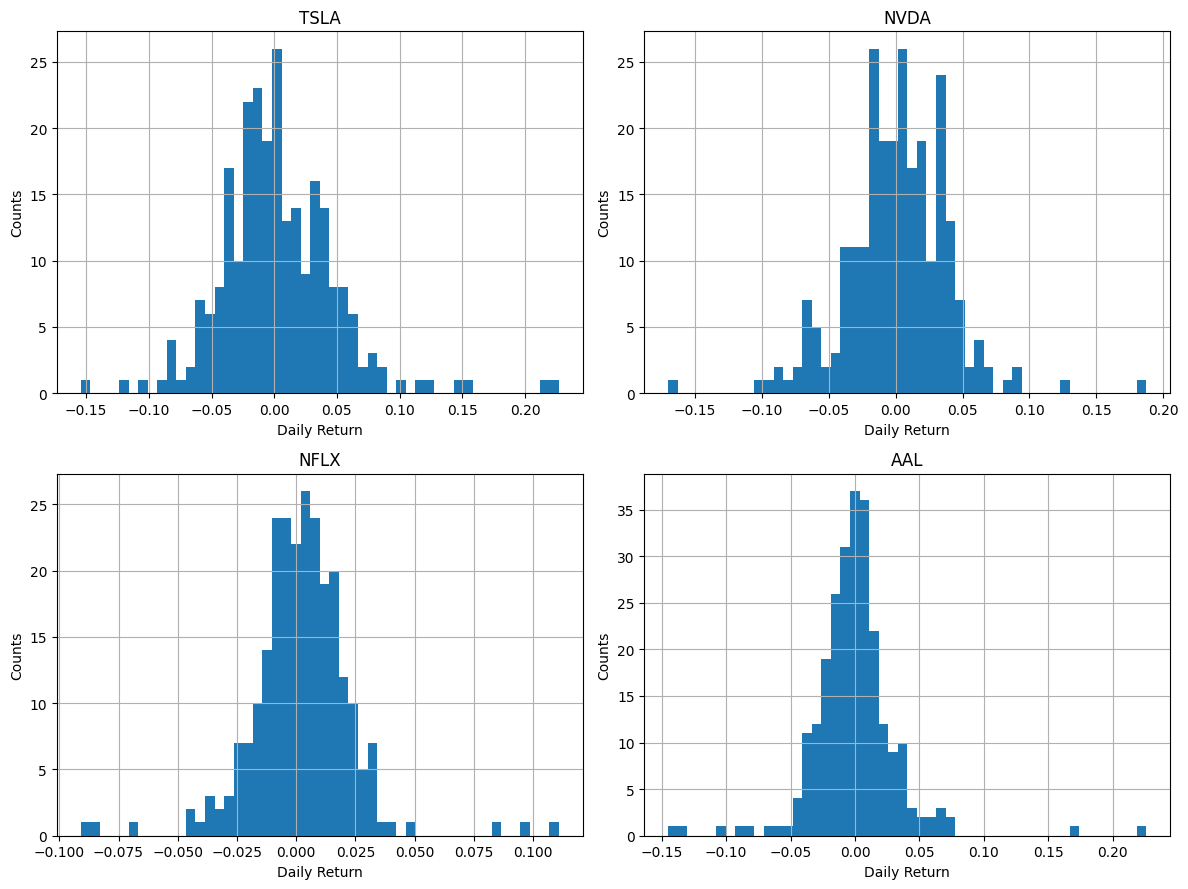

In [13]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

# What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [14]:
# Grab all the closing prices for the tech stock list into one DataFrame
from pandas_datareader import data as pdr

closing_df = yf.download(tech_list, start=start, end=end) ['Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAL,NFLX,NVDA,TSLA
Date,,,,
2024-04-16,NaN,NaN,NaN,NaN
2024-04-17,0.066002,-0.006202,-0.038666,-0.010566
2024-04-18,0.009359,-0.005100,0.007568,-0.035510
2024-04-19,0.006419,-0.090933,-0.100046,-0.019209
2024-04-22,0.029766,-0.000793,0.043543,-0.034002


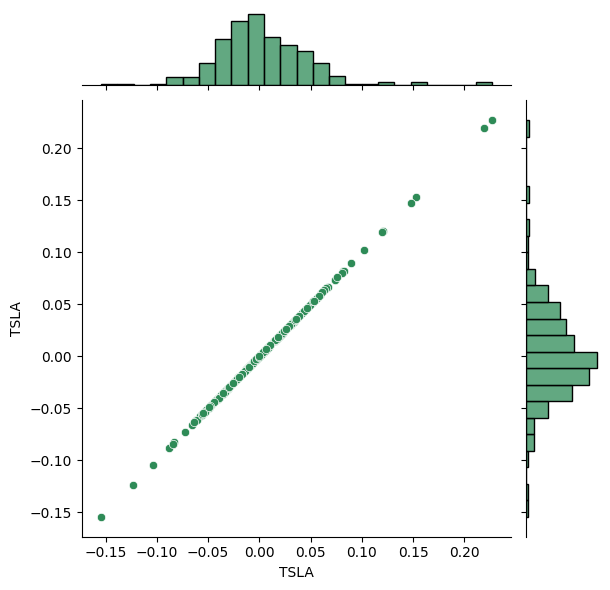

In [15]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='TSLA', y='TSLA', data=tech_rets, kind='scatter', color='seagreen')

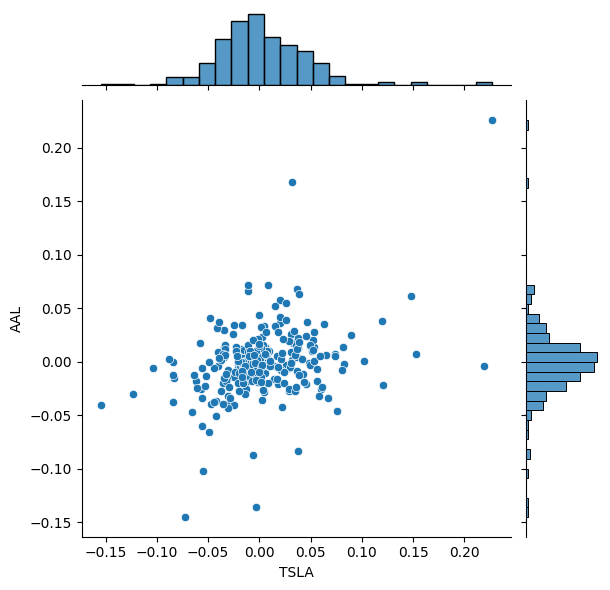

In [16]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='TSLA', y='AAL', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

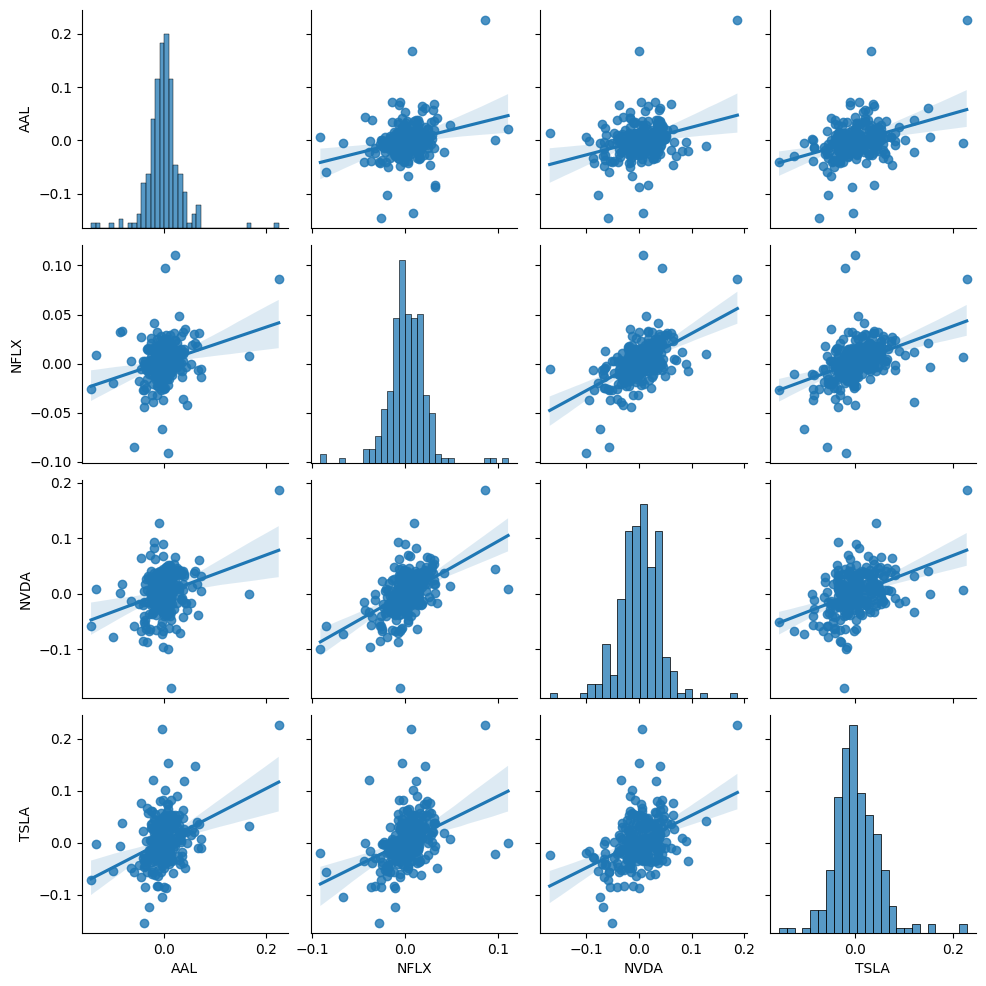

In [17]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

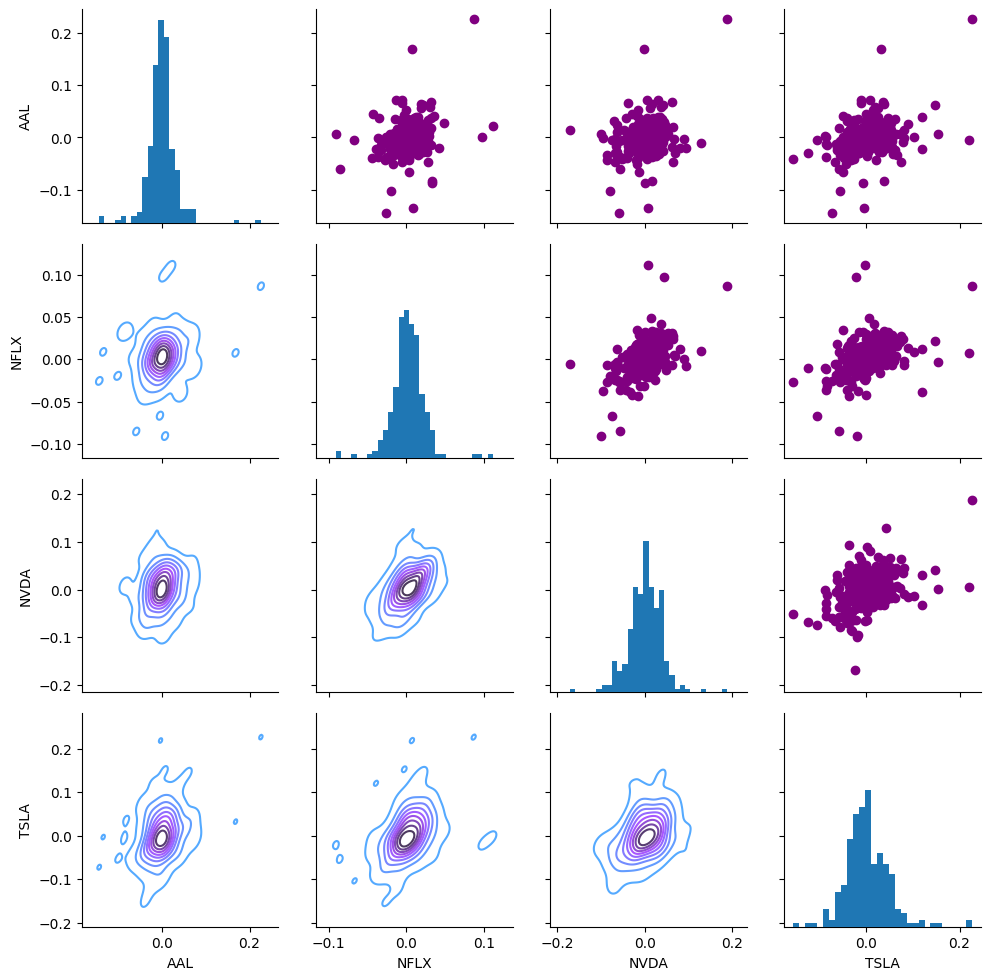

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

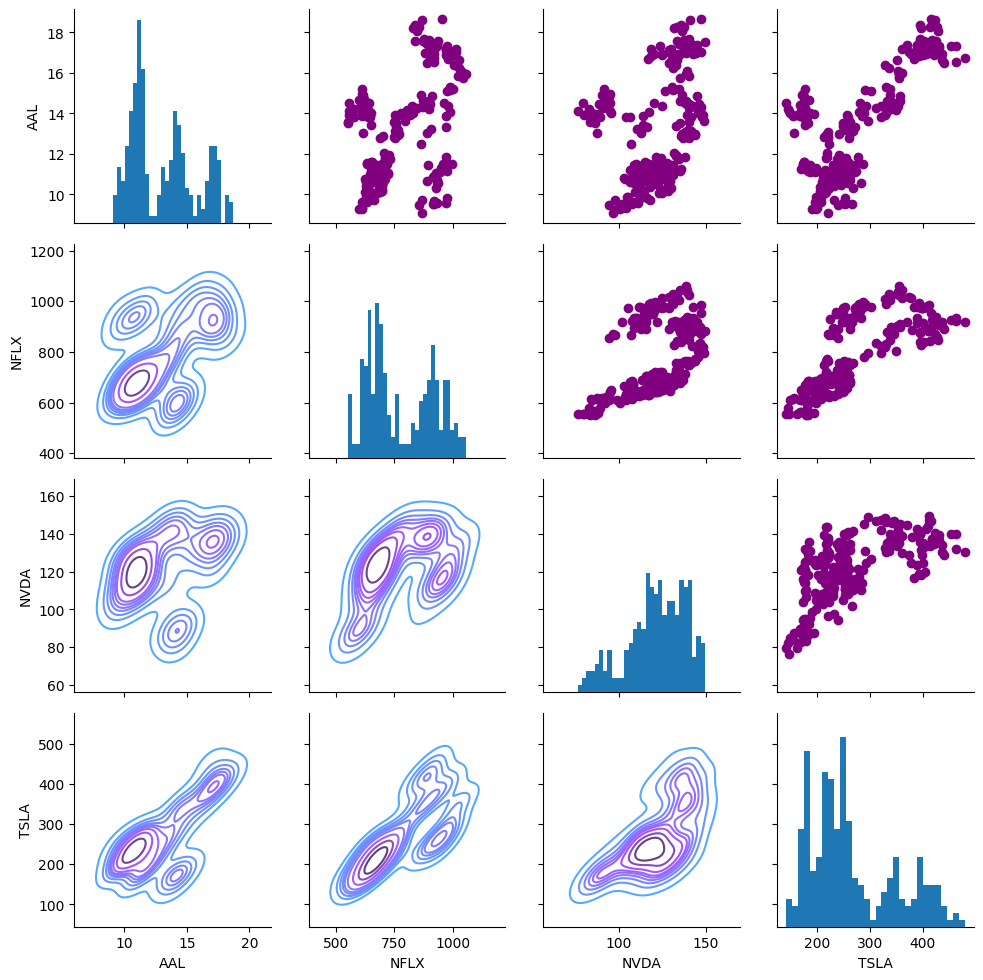

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

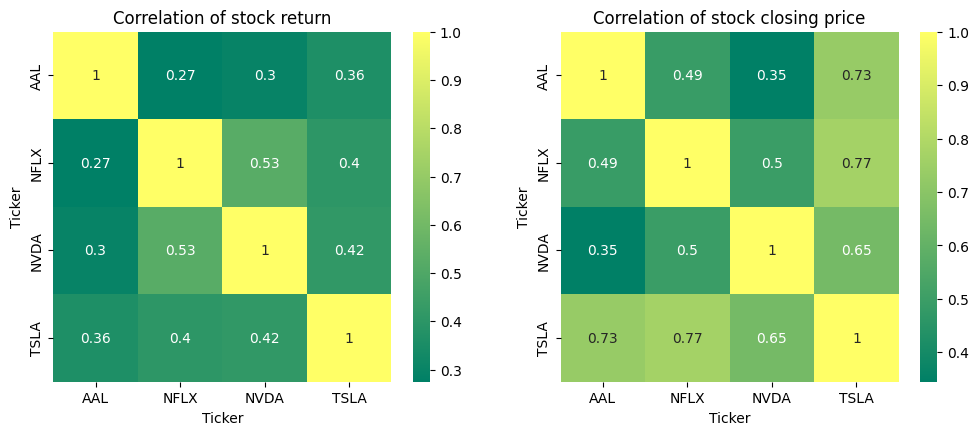

In [20]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# Sprint 2 development

[*********************100%***********************]  1 of 1 completed

🔄 Training model for TSLA...



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0298 - val_loss: 0.0017
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0016 - val_loss: 6.8713e-04
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - val_loss: 7.8267e-04
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016 - val_loss: 6.1159e-04
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - val_loss: 6.1969e-04
Epoch 9/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0010 - val_loss: 4.5660e-04
Epoch 10/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010 - val_loss: 4.7416e-04
Epoch 11/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.5197e-04 - val_loss: 5.7619e-04
Epoch 12/30
121/1

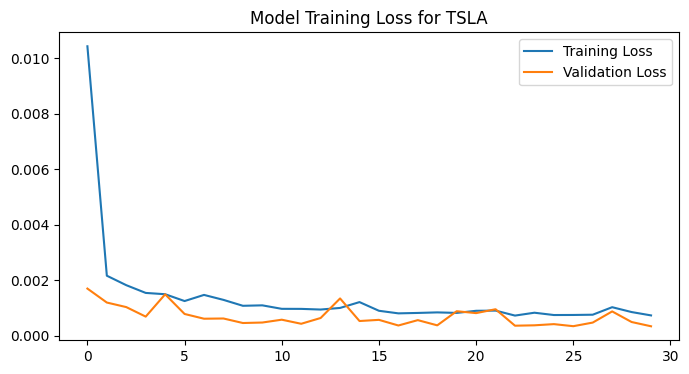

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


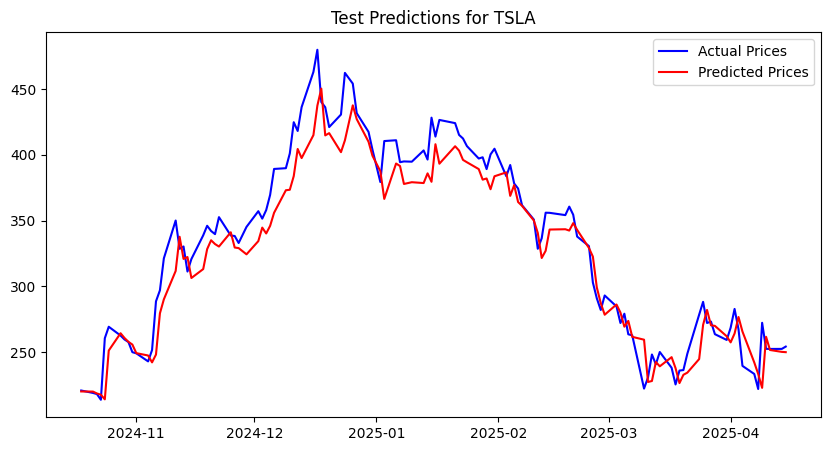

[*********************100%***********************]  1 of 1 completed

✅ Model for TSLA trained and saved successfully!

🔄 Training model for NVDA...
Epoch 1/30



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0065 - val_loss: 0.0242
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.9182e-04 - val_loss: 0.0023
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.0416e-04 - val_loss: 0.0029
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.6247e-04 - val_loss: 0.0022
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.8493e-04 - val_loss: 0.0019
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9277e-04 - val_loss: 0.0076
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1852e-04 - val_loss: 0.0029
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7812e-04 - val_loss: 0.0025
Epoch 9/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.3177e-04 - val_loss: 0.0030
Epoch 10/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5224e-04 - val_loss: 0.0014
Epoch 11/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.4956e-04 - val_loss: 0.0123
Epoch 12/30
121/121 ━

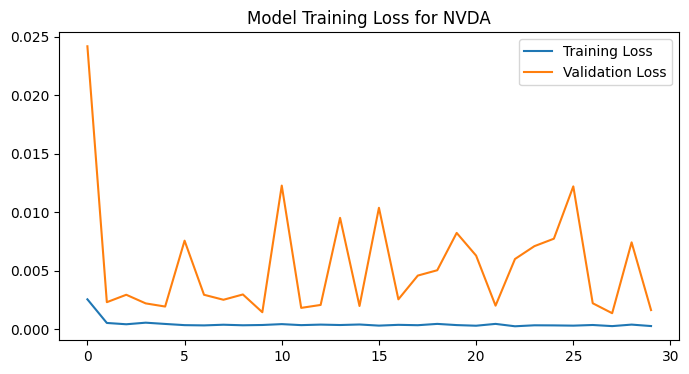

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


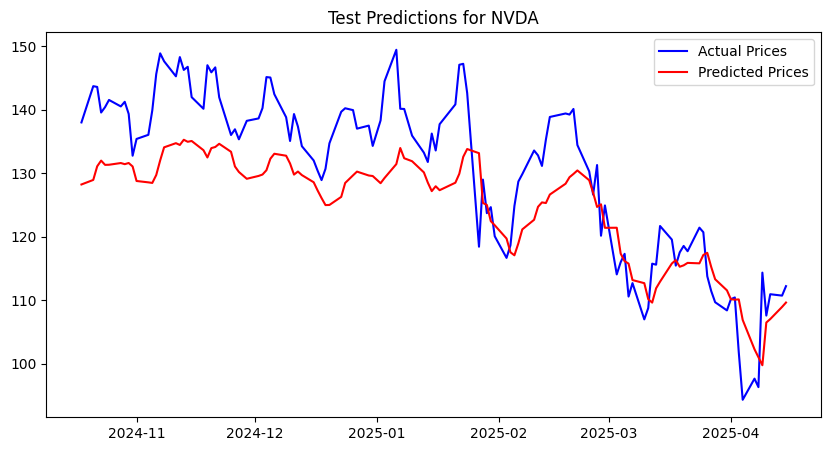

✅ Model for NVDA trained and saved successfully!

🔄 Training model for NFLX...


[*********************100%***********************]  1 of 1 completed

Epoch 1/30



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0085 - val_loss: 0.0026
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012 - val_loss: 3.0068e-04
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.1676e-04 - val_loss: 2.3915e-04
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.6891e-04 - val_loss: 0.0018
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.2062e-04 - val_loss: 1.9453e-04
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.3246e-04 - val_loss: 2.4998e-04
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.3447e-04 - val_loss: 8.8177e-04
Epoch 9/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.5155e-04 - val_loss: 0.0013
Epoch 10/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.8035e-04 - val_loss: 3.8367e-04
Epoch 11/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.9658e-04 - val_loss: 0.0015
Epoc

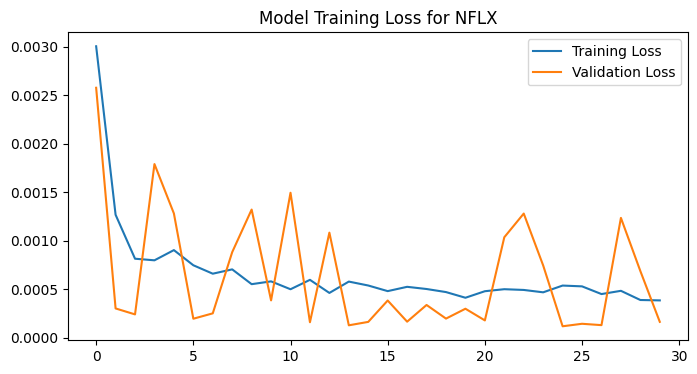

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


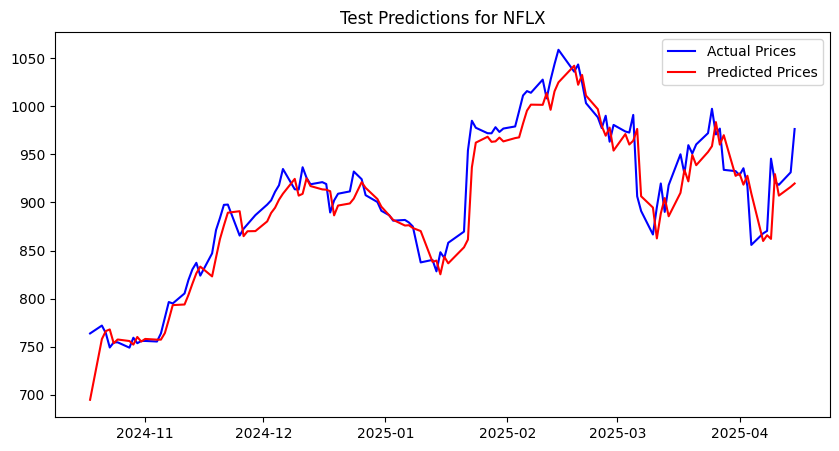

✅ Model for NFLX trained and saved successfully!

🔄 Training model for AAL...


[*********************100%***********************]  1 of 1 completed

Epoch 1/30



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0193 - val_loss: 0.0013
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0039 - val_loss: 8.4537e-04
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0028 - val_loss: 9.7720e-04
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 9/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 10/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 11/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 12/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

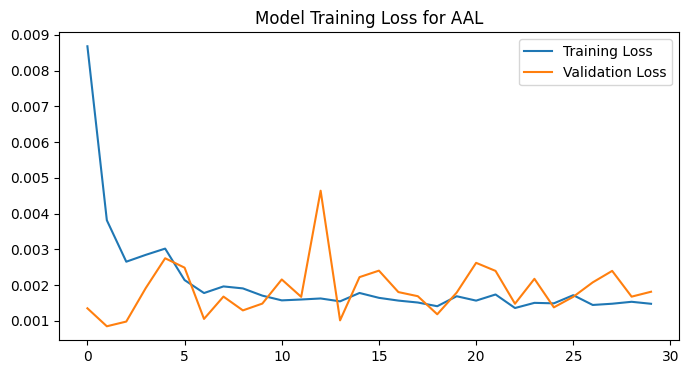

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


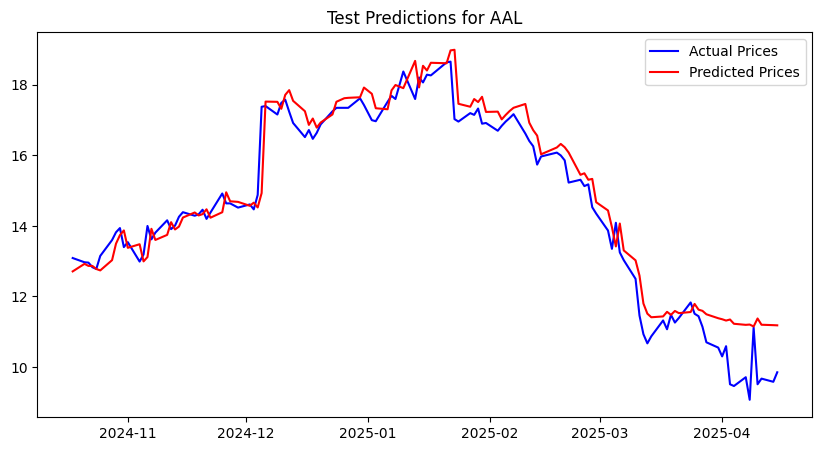

✅ Model for AAL trained and saved successfully!



In [21]:
# Function to fetch stock data for the last 5 years
def fetch_data(ticker, years=5):
    end_date = datetime.datetime.today().strftime('%Y-%m-%d')
    start_date = (datetime.datetime.today() - datetime.timedelta(days=years*365)).strftime('%Y-%m-%d')
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to create sequences
def create_sequences(data, sequence_length=50):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:i+sequence_length])
        y.append(scaled_data[i+sequence_length, 0])

    X, y = np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

    # Split into train (80%), validation (10%), and test (10%)
    train_size = int(0.8 * len(X))
    val_size = int(0.1 * len(X))

    X_train, y_train = X[:train_size], y[:train_size]
    X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
    X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

    return X_train, y_train, X_val, y_val, X_test, y_test, scaler

# Function to build, train, and save LSTM model
def train_lstm_model(stock):
    data = fetch_data(stock, years=5)
    X_train, y_train, X_val, y_val, X_test, y_test, scaler = create_sequences(data[['Close']].values)

    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(128, return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(1)
    ])

    optimizer = Adam(learning_rate=0.003)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=8, verbose=1)

    model.save(f"{stock}_lstm_model.keras")  # Save model
    np.save(f"{stock}_scaler.npy", scaler)   # Save scaler

    # Visualization: Training Loss
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label="Training Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.legend()
    plt.title(f"Model Training Loss for {stock}")
    plt.show()

    # Test Predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

    plt.figure(figsize=(10,5))
    plt.plot(data.index[-len(predictions):], scaler.inverse_transform(y_test.reshape(-1,1)), label="Actual Prices", color="blue")
    plt.plot(data.index[-len(predictions):], predictions, label="Predicted Prices", color="red")
    plt.title(f"Test Predictions for {stock}")
    plt.legend()
    plt.show()

# Train models for multiple stocks
stocks = ["TSLA", "NVDA", "NFLX", "AAL"]
for stock in stocks:
    print(f"🔄 Training model for {stock}...")
    train_lstm_model(stock)
    print(f"✅ Model for {stock} trained and saved successfully!\n")


In [23]:
%%writefile stock_market_analysis_and_prediction_using_LSTM.py
import streamlit as st
import yfinance as yf
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates
import seaborn as sns

# Apply Seaborn styling
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Inject custom CSS for background and UI improvements
st.markdown(
    """
    <style>
    .stApp {
        background-image: url("https://github.com/eduar-infante/capstone-pytorch/blob/main/nick-chong-N__BnvQ_w18-unsplash%20(1).jpg?raw=true");
        background-attachment: fixed;
        background-size: cover;
        background-repeat: no-repeat;
        background-position: center;
    }

    /* Dark overlay for better readability */
    .stApp::before {
        content: "";
        position: fixed;
        top: 0;
        left: 0;
        width: 100%;
        height: 100%;
        background: rgba(0, 0, 0, 0.5);
        z-index: -1;
    }

    /* Main content block */
    .block-container {
        background: rgba(255, 255, 255, 0.9);
        padding: 2rem;
        border-radius: 15px;
        box-shadow: 0px 4px 15px rgba(0,0,0,0.2);
        max-width: 850px;
        margin: auto;
    }

    /* Title */
    .stApp h1 {
        color: #FFA500;
        font-size: 2.8em;
        font-weight: 700;
        text-align: center;
    }

    /* Buttons */
    div.stButton > button {
        background-color: #0066cc;
        color: white;
        border-radius: 10px;
        padding: 0.8em 1.6em;
        font-size: 1em;
        font-weight: bold;
        border: none;
        cursor: pointer;
        transition: background-color 0.3s ease;
    }

    div.stButton > button:hover {
        background-color: #004c99;
    }

    /* Selectbox */
    .stSelectbox > div {
        background-color: #ffffff;
        color: #333333;
        border-radius: 10px;
    }

    /* Slider label */
    .stSlider > div {
        color: #ffffff;
    }

    /* Dataframe container */
    .stDataFrame {
        background-color: rgba(255, 255, 255, 0.95);
        border-radius: 8px;
    }
    </style>
    """,
    unsafe_allow_html=True
)

# Function to fetch stock data
def fetch_latest_data(stock, years=5):
    end_date = datetime.datetime.today().strftime('%Y-%m-%d')
    start_date = (datetime.datetime.today() - datetime.timedelta(days=years * 365)).strftime('%Y-%m-%d')
    stock_data = yf.download(stock, start=start_date, end=end_date)
    return stock_data

# Function to create sequences
def create_sequences(data, sequence_length=50):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:i+sequence_length])
        y.append(scaled_data[i+sequence_length, 0])

    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32), scaler

# Function to fine-tune the model
def fine_tune_model(stock):
    model_path = f"{stock}_lstm_model.keras"
    scaler_path = f"{stock}_scaler.npy"

    if os.path.exists(model_path) and os.path.exists(scaler_path):
        st.write(f"🔄 Loading existing model for {stock}...")

        model = load_model(model_path)
        latest_data = fetch_latest_data(stock, years=1)
        X_train, y_train, scaler = create_sequences(latest_data[['Close']].values)

        st.write(f"🔧 Fine-tuning model for {stock}...")
        model.fit(X_train, y_train, epochs=3, batch_size=16, verbose=1)

        model.save(model_path)
        np.save(scaler_path, scaler)
        st.success(f"✅ Model for {stock} fine-tuned and saved successfully!")

    else:
        st.error(f"No saved model found for {stock}. Please train the model first.")

# Function to predict future prices
def predict_future(stock, days=30):
    model_path = f"{stock}_lstm_model.keras"
    scaler_path = f"{stock}_scaler.npy"

    if not os.path.exists(model_path) or not os.path.exists(scaler_path):
        st.error(f"No saved model found for {stock}. Train or fine-tune the model first.")
        return None

    model = load_model(model_path)
    scaler = np.load(scaler_path, allow_pickle=True).item()

    stock_data = fetch_latest_data(stock, years=5)
    last_50_days = stock_data[['Close']].values[-50:]
    last_50_days_scaled = scaler.transform(last_50_days)

    predictions = []
    for _ in range(days):
        X_input = np.array([last_50_days_scaled], dtype=np.float32)
        next_pred = model.predict(X_input)[0, 0]
        predictions.append(next_pred)
        last_50_days_scaled = np.vstack([last_50_days_scaled[1:], [next_pred]])

    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Streamlit UI Layout
st.title("📈 Stock Market LSTM Prediction & Fine-Tuning")

with st.container():
    stocks = ["TSLA", "NVDA", "NFLX", "AAL"]
    selected_stock = st.selectbox("Select a stock:", stocks)

    col1, col2 = st.columns(2)

    with col1:
        if st.button("📥 Load Latest Data"):
            data = fetch_latest_data(selected_stock, years=1)
            st.write(f"📊 Latest 1-Year Stock Data for {selected_stock}:")
            st.dataframe(data.tail())
            st.line_chart(data["Close"])

    with col2:
        if st.button("🛠️ Fine-Tune Model"):
            fine_tune_model(selected_stock)

    st.markdown("### 🔮 Prediction Settings")
    days_to_predict = st.slider("Days to predict:", min_value=1, max_value=30, value=10)

    if st.button("🚀 Predict Future Prices"):
        future_prices = predict_future(selected_stock, days=days_to_predict)

        if future_prices is not None:
            future_dates = [datetime.datetime.today() + datetime.timedelta(days=i) for i in range(days_to_predict)]
            future_df = pd.DataFrame({"Date": future_dates, "Predicted Price": future_prices.flatten()})

            col1, col2 = st.columns([1, 2])

            with col1:
                st.markdown(f"#### 📅 Future Stock Prices for {selected_stock}:")
                future_df["Date"] = future_df["Date"].dt.strftime('%Y-%m-%d')
                st.dataframe(future_df)

            with col2:
                fig, ax = plt.subplots(figsize=(7, 4))
                ax.plot(future_df["Date"], future_df["Predicted Price"], marker='o', linestyle='dashed', color='#FF5733', label="Predicted")
                ax.set_xlabel("Date")
                ax.set_ylabel("Predicted Price")
                ax.set_title(f"Predicted Stock Prices for {selected_stock}")
                plt.xticks(rotation=30)
                ax.legend()
                st.pyplot(fig)

            past_data = fetch_latest_data(selected_stock, years=5).reset_index()[["Date", "Close"]]
            past_data.columns = ["Date", "Stock Price"]

            split_idx = int(len(past_data) * 0.8)
            train_data = past_data[:split_idx]
            val_data = past_data[split_idx:]

            train_data["Date"] = pd.to_datetime(train_data["Date"])
            val_data["Date"] = pd.to_datetime(val_data["Date"])
            future_df["Date"] = pd.to_datetime(future_df["Date"])

            fig2, ax2 = plt.subplots(figsize=(14, 5))
            ax2.plot(train_data["Date"], train_data["Stock Price"], color='blue', linewidth=2, label="Train")
            ax2.plot(val_data["Date"], val_data["Stock Price"], color='orange', linewidth=2, label="Validation")
            ax2.plot(future_df["Date"], future_df["Predicted Price"], color='red', linestyle='dashed', linewidth=2, label="Predictions")

            ax2.xaxis.set_major_locator(mdates.YearLocator(1))
            ax2.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
            ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

            plt.xticks(rotation=30)
            ax2.set_ylabel("Stock Price (USD)")
            ax2.set_title(f"Stock Price Trends for {selected_stock} (Train, Validation & Predictions)")
            ax2.legend()

            st.pyplot(fig2)

            # Plot actual price (last 2 months) + predicted price (next X days)
            # 60 days = 2 months approx
            last_2_months_data = fetch_latest_data(selected_stock, years=1).reset_index()
            last_2_months_data = last_2_months_data[["Date", "Close"]].tail(60)

            # Ensure the dates are datetime for consistent plotting
            last_2_months_data["Date"] = pd.to_datetime(last_2_months_data["Date"])
            future_df["Date"] = pd.to_datetime(future_df["Date"])

            fig3, ax3 = plt.subplots(figsize=(14, 5))

            # Plot actual last 2 months
            ax3.plot(last_2_months_data["Date"], last_2_months_data["Close"],
                    color='blue', linewidth=2, label="Actual Price (Last 2 Months)")

            # Plot future predicted prices
            ax3.plot(future_df["Date"], future_df["Predicted Price"],
                    color='red', linewidth=2, linestyle='dashed', label=f"Predicted Price (Next {days_to_predict} Days)")

            ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            ax3.xaxis.set_major_locator(mdates.DayLocator(interval=7))

            plt.xticks(rotation=45)
            ax3.set_xlabel("Date")
            ax3.set_ylabel("Stock Price (USD)")
            ax3.set_title(f"{selected_stock} - Last 2 Months Actual & Next {days_to_predict} Days Prediction")
            ax3.legend()

            st.pyplot(fig3)


Writing stock_market_analysis_and_prediction_using_LSTM.py


In [24]:
!streamlit run stock_market_analysis_and_prediction_using_LSTM.py &>/dev/null &

In [25]:
from pyngrok import ngrok

# Set authtoken
ngrok.set_auth_token("2pjVN0MbaSsRtQxs7jBlMc0pdPh_44n6gMg35S5AWHQ8yEHcT")

# Kill any existing ngrok processes to avoid the 'simultaneous sessions' error
!killall ngrok

# Define tunnel configuration for HTTPv2Tunnel
tunnel_config = {
    "proto": "http",
    "addr": 8501,
}
# Connect to Ngrok
public_url = ngrok.connect(**tunnel_config).public_url

# Append the bypass parameter
bypass_url = f"{public_url}?ngrok-skip-browser-warning=1"

print(f"🔗 Click here to access Streamlit App: {bypass_url}")

ngrok: no process found
🔗 Click here to access Streamlit App: https://e98e-34-19-23-165.ngrok-free.app?ngrok-skip-browser-warning=1
